In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [3]:
import os
os.getcwd()

'/mnt/c/Users/PC/Desktop/mcrc-cetuximab-analysis/notebooks'

In [4]:
ann_all = pd.read_csv("../data/ann.csv", sep=',', index_col=0)

In [5]:
ann_all

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,taxid_ch1,...,contact_zip/postal_code,contact_country,instrument_model,library_selection,library_source,library_strategy,relation,supplementary_file_1,series_id,data_row_count
sample_id,,,,,,,,,,,,,,,,,,,,,
GSM5575333,['POST-R-001 [18R649_010]'],['GSM5575333'],['Public on Sep 16 2021'],['Sep 12 2021'],['Sep 16 2021'],['SRA'],['1'],['colorectal cancer'],['Homo sapiens'],['9606'],...,['05505'],['South Korea'],['Illumina HiSeq 2500'],['cDNA'],['transcriptomic'],['RNA-Seq'],['BioSample: https://www.ncbi.nlm.nih.gov/bios...,['NONE'],['GSE183984'],['0']
GSM5575334,['PAIR-R-001-pre [18R654_15]'],['GSM5575334'],['Public on Sep 16 2021'],['Sep 12 2021'],['Sep 16 2021'],['SRA'],['1'],['colorectal cancer'],['Homo sapiens'],['9606'],...,['05505'],['South Korea'],['Illumina HiSeq 2500'],['cDNA'],['transcriptomic'],['RNA-Seq'],['BioSample: https://www.ncbi.nlm.nih.gov/bios...,['NONE'],['GSE183984'],['0']
GSM5575335,['PAIR-R-001 [18R655_016]'],['GSM5575335'],['Public on Sep 16 2021'],['Sep 12 2021'],['Sep 16 2021'],['SRA'],['1'],['colorectal cancer'],['Homo sapiens'],['9606'],...,['05505'],['South Korea'],['Illumina HiSeq 2500'],['cDNA'],['transcriptomic'],['RNA-Seq'],['BioSample: https://www.ncbi.nlm.nih.gov/bios...,['NONE'],['GSE183984'],['0']
GSM5575336,['POST-R-002 [18R669_01]'],['GSM5575336'],['Public on Sep 16 2021'],['Sep 12 2021'],['Sep 16 2021'],['SRA'],['1'],['colorectal cancer'],['Homo sapiens'],['9606'],...,['05505'],['South Korea'],['Illumina HiSeq 2500'],['cDNA'],['transcriptomic'],['RNA-Seq'],['BioSample: https://www.ncbi.nlm.nih.gov/bios...,['NONE'],['GSE183984'],['0']
GSM5575337,['PAIR-R-002 [18R670_02]'],['GSM5575337'],['Public on Sep 16 2021'],['Sep 12 2021'],['Sep 16 2021'],['SRA'],['1'],['colorectal cancer'],['Homo sapiens'],['9606'],...,['05505'],['South Korea'],['Illumina HiSeq 2500'],['cDNA'],['transcriptomic'],['RNA-Seq'],['BioSample: https://www.ncbi.nlm.nih.gov/bios...,['NONE'],['GSE183984'],['0']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM5575441,['PRE-R-051 [18R454_027]'],['GSM5575441'],['Public on Sep 16 2021'],['Sep 12 2021'],['Sep 16 2021'],['SRA'],['1'],['colorectal cancer'],['Homo sapiens'],['9606'],...,['05505'],['South Korea'],['Illumina HiSeq 2500'],['cDNA'],['transcriptomic'],['RNA-Seq'],['BioSample: https://www.ncbi.nlm.nih.gov/bios...,['NONE'],['GSE183984'],['0']
GSM5575442,['PRE-R-052 [18R477_019]'],['GSM5575442'],['Public on Sep 16 2021'],['Sep 12 2021'],['Sep 16 2021'],['SRA'],['1'],['colorectal cancer'],['Homo sapiens'],['9606'],...,['05505'],['South Korea'],['Illumina HiSeq 2500'],['cDNA'],['transcriptomic'],['RNA-Seq'],['BioSample: https://www.ncbi.nlm.nih.gov/bios...,['NONE'],['GSE183984'],['0']
GSM5575443,['PRE-10 [18R507_004]'],['GSM5575443'],['Public on Sep 16 2021'],['Sep 12 2021'],['Sep 16 2021'],['SRA'],['1'],['colorectal cancer'],['Homo sapiens'],['9606'],...,['05505'],['South Korea'],['Illumina HiSeq 2500'],['cDNA'],['transcriptomic'],['RNA-Seq'],['BioSample: https://www.ncbi.nlm.nih.gov/bios...,['NONE'],['GSE183984'],['0']


In [6]:
ann_all = ann_all.reset_index()

In [7]:
ann_all.title = ann_all.title.str.extract(r'\[([A-Z0-9_]+)\]')
ann_all = ann_all.set_index('title')
mapper = ann_all.sample_id.to_dict()
# df_dict = df.set_index('key')['value'].to_dict()

In [8]:
ann_all

,sample_id,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,taxid_ch1,...,contact_zip/postal_code,contact_country,instrument_model,library_selection,library_source,library_strategy,relation,supplementary_file_1,series_id,data_row_count
title,,,,,,,,,,,,,,,,,,,,,
18R649_010,GSM5575333,['GSM5575333'],['Public on Sep 16 2021'],['Sep 12 2021'],['Sep 16 2021'],['SRA'],['1'],['colorectal cancer'],['Homo sapiens'],['9606'],...,['05505'],['South Korea'],['Illumina HiSeq 2500'],['cDNA'],['transcriptomic'],['RNA-Seq'],['BioSample: https://www.ncbi.nlm.nih.gov/bios...,['NONE'],['GSE183984'],['0']
18R654_15,GSM5575334,['GSM5575334'],['Public on Sep 16 2021'],['Sep 12 2021'],['Sep 16 2021'],['SRA'],['1'],['colorectal cancer'],['Homo sapiens'],['9606'],...,['05505'],['South Korea'],['Illumina HiSeq 2500'],['cDNA'],['transcriptomic'],['RNA-Seq'],['BioSample: https://www.ncbi.nlm.nih.gov/bios...,['NONE'],['GSE183984'],['0']
18R655_016,GSM5575335,['GSM5575335'],['Public on Sep 16 2021'],['Sep 12 2021'],['Sep 16 2021'],['SRA'],['1'],['colorectal cancer'],['Homo sapiens'],['9606'],...,['05505'],['South Korea'],['Illumina HiSeq 2500'],['cDNA'],['transcriptomic'],['RNA-Seq'],['BioSample: https://www.ncbi.nlm.nih.gov/bios...,['NONE'],['GSE183984'],['0']
18R669_01,GSM5575336,['GSM5575336'],['Public on Sep 16 2021'],['Sep 12 2021'],['Sep 16 2021'],['SRA'],['1'],['colorectal cancer'],['Homo sapiens'],['9606'],...,['05505'],['South Korea'],['Illumina HiSeq 2500'],['cDNA'],['transcriptomic'],['RNA-Seq'],['BioSample: https://www.ncbi.nlm.nih.gov/bios...,['NONE'],['GSE183984'],['0']
18R670_02,GSM5575337,['GSM5575337'],['Public on Sep 16 2021'],['Sep 12 2021'],['Sep 16 2021'],['SRA'],['1'],['colorectal cancer'],['Homo sapiens'],['9606'],...,['05505'],['South Korea'],['Illumina HiSeq 2500'],['cDNA'],['transcriptomic'],['RNA-Seq'],['BioSample: https://www.ncbi.nlm.nih.gov/bios...,['NONE'],['GSE183984'],['0']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18R454_027,GSM5575441,['GSM5575441'],['Public on Sep 16 2021'],['Sep 12 2021'],['Sep 16 2021'],['SRA'],['1'],['colorectal cancer'],['Homo sapiens'],['9606'],...,['05505'],['South Korea'],['Illumina HiSeq 2500'],['cDNA'],['transcriptomic'],['RNA-Seq'],['BioSample: https://www.ncbi.nlm.nih.gov/bios...,['NONE'],['GSE183984'],['0']
18R477_019,GSM5575442,['GSM5575442'],['Public on Sep 16 2021'],['Sep 12 2021'],['Sep 16 2021'],['SRA'],['1'],['colorectal cancer'],['Homo sapiens'],['9606'],...,['05505'],['South Korea'],['Illumina HiSeq 2500'],['cDNA'],['transcriptomic'],['RNA-Seq'],['BioSample: https://www.ncbi.nlm.nih.gov/bios...,['NONE'],['GSE183984'],['0']
18R507_004,GSM5575443,['GSM5575443'],['Public on Sep 16 2021'],['Sep 12 2021'],['Sep 16 2021'],['SRA'],['1'],['colorectal cancer'],['Homo sapiens'],['9606'],...,['05505'],['South Korea'],['Illumina HiSeq 2500'],['cDNA'],['transcriptomic'],['RNA-Seq'],['BioSample: https://www.ncbi.nlm.nih.gov/bios...,['NONE'],['GSE183984'],['0']


In [9]:
mapper

{'18R649_010': 'GSM5575333',
 '18R654_15': 'GSM5575334',
 '18R655_016': 'GSM5575335',
 '18R669_01': 'GSM5575336',
 '18R670_02': 'GSM5575337',
 '18R671_03': 'GSM5575338',
 '18R674_06': 'GSM5575339',
 '18R675_07': 'GSM5575340',
 '18R677_09': 'GSM5575341',
 '18R678_010': 'GSM5575342',
 '18R683_015': 'GSM5575343',
 '18R684_016': 'GSM5575344',
 '18R689_022': 'GSM5575345',
 '18R690_023': 'GSM5575346',
 '18R694_02': 'GSM5575347',
 '18R697_05': 'GSM5575348',
 '18R699_07': 'GSM5575349',
 '18R700_08': 'GSM5575350',
 '18R429_009': 'GSM5575351',
 '18R651_012': 'GSM5575352',
 '18R430_010': 'GSM5575353',
 '18R682_014': 'GSM5575354',
 '18R688_021': 'GSM5575355',
 '18R298_0010': 'GSM5575356',
 '18R305_0007': 'GSM5575357',
 '18R646_007': 'GSM5575358',
 '18R647_08': 'GSM5575359',
 '18R648_09': 'GSM5575360',
 '18R294_0001': 'GSM5575361',
 '18R297_0009': 'GSM5575362',
 '18R295_0003': 'GSM5575363',
 '18R175_0011': 'GSM5575364',
 '18R296_0008': 'GSM5575365',
 '18R179_0023': 'GSM5575366',
 '18R318_0005': 'GS

In [10]:
exp_data = pd.read_csv("/mnt/c/Users/PC/Desktop/mcrc-cetuximab-analysis/notebooks/log2_tpm_hgnc_matrix_no_metastases.csv", sep=',')

In [11]:
cols = exp_data.columns.tolist()
cols[0] = 'GSM_id'

In [12]:
exp_data.columns = cols

In [13]:
exp_data['GSM_id'] = exp_data.GSM_id.map(mapper)

In [14]:
exp_data.to_csv("../data/expressions.csv", sep=',')

In [15]:
# 1. Загрузим данные
patients_df = pd.read_csv('/mnt/c/Users/PC/Desktop/mcrc-cetuximab-analysis/data/useful_ann.csv', sep=',',index_col = 0)
patients_df.columns = ['some_id', 'sample_title', 'tissue', 'time_point', 'treatment_response','patient_id']

In [16]:
patients_df

,some_id,sample_title,tissue,time_point,treatment_response,patient_id
GSM5575333,18R649_010,POST-R-001,primary tumor (colorectum),post-treatment,post-Tx non-PD,1
GSM5575334,18R654_15,PAIR-R-001-pre,primary tumor (colorectum),pre-treatment,pre-Tx,1
GSM5575335,18R655_016,PAIR-R-001,liver metastases,post-treatment,post-tx PD,1
GSM5575336,18R669_01,POST-R-002,primary tumor (colorectum),post-treatment,post-Tx non-PD,2
GSM5575337,18R670_02,PAIR-R-002,primary tumor (colorectum),NaN,pre-Tx,2
...,...,...,...,...,...,...
GSM5575441,18R454_027,PRE-R-051,primary tumor (colorectum),pre-treatment,pre-Tx,51
GSM5575442,18R477_019,PRE-R-052,primary tumor (colorectum),pre-treatment,pre-Tx,52
GSM5575443,18R507_004,PRE-10,primary tumor (colorectum),pre-treatment,pre-Tx,10
GSM5575444,18R428_008,PRE-R-054,primary tumor (colorectum),pre-treatment,pre-Tx,54


In [17]:
patients_df.treatment_response.value_counts()

treatment_response
pre-Tx            76
post-tx PD        21
post-Tx non-PD    16
Name: count, dtype: int64

In [18]:
PD = patients_df.query("treatment_response == 'post-tx PD'")
non_PD = patients_df.query("treatment_response == 'post-Tx non-PD'")

In [19]:
exp_data

,GSM_id,18R649_010,18R669_01,18R670_02,18R674_06,18R678_010,18R683_015,18R689_022,18R690_023,18R694_02,...,18R702_010,18R656_018,18R657_019,18R673_05,18R465_006,18R454_027,18R477_019,18R507_004,18R428_008,18R705_013
0,NaN,4.915061,6.960488,6.822044,6.476123,7.001439,5.979740,5.012969,5.464352,4.026421,...,6.549435,7.265678,7.556717,7.148274,5.092725,6.876043,7.975755,8.091057,5.093825,6.036070
1,NaN,0.384840,0.797997,1.669769,1.295722,0.555135,0.296034,0.000000,0.354330,0.592227,...,0.225956,1.124204,1.063758,0.118022,0.267286,0.537797,2.013335,1.743997,0.059718,0.827143
2,NaN,4.840414,6.777641,6.197991,6.317775,6.464409,6.650423,5.208876,5.451409,4.846793,...,6.331933,7.158524,7.260243,7.085872,5.635827,7.239904,7.678208,7.805770,5.089112,6.584128
3,NaN,2.604751,2.808040,2.260861,2.898430,2.351833,2.717201,2.542211,2.481304,1.710404,...,2.495859,2.757291,2.360323,2.107795,2.820362,2.678120,2.930845,2.767079,2.639453,2.364625
4,NaN,1.389172,2.503991,1.464436,1.953881,2.354043,1.959017,1.819476,1.769135,0.989802,...,1.530562,1.884272,1.662369,1.925506,1.826833,2.519411,2.122102,2.212239,1.514346,1.649746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19452,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19453,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19454,NaN,0.684338,0.000000,0.000000,0.000000,0.158944,0.000000,0.000000,0.000000,0.000000,...,1.297672,0.000000,0.000000,0.000000,3.897942,1.469403,0.000000,0.000000,0.000000,0.000000
19455,NaN,0.000000,0.000000,0.000000,4.015569,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [20]:
PD_samples = PD.index.to_list()
PD_exp = exp_data.query("GSM_id in @PD_samples")

In [21]:
non_PD_samples = PD.index.to_list()
non_PD_exp = exp_data.query("GSM_id in @non_PD_samples")

In [22]:
pip install statsmodels



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


PD group normality: p = 0.7472 (normal)
non-PD group normality: p = 0.1508 (normal)


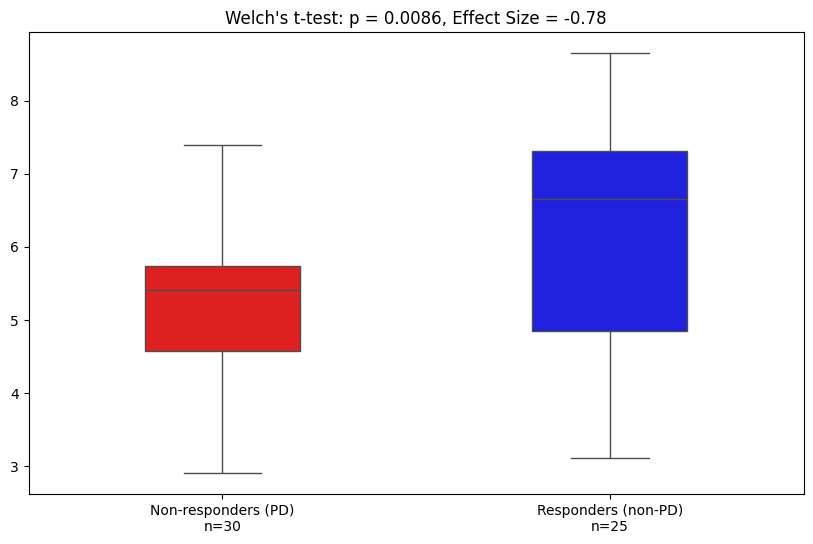

Test: Welch's t-test
p-value: 0.0086
Effect size: -0.78


In [33]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data preparation (replace with your actual data loading)
# met_pd = PD_exp['MET'].dropna()
# met_non_pd = non_PD_exp['MET'].dropna()
met_pd = np.random.normal(5, 1, 30)  # Example data
met_non_pd = np.random.normal(6, 1.2, 25)  # Example data

# 1. Normality check
def check_normality(data, group_name):
    if len(data) < 5000:
        stat, p = stats.shapiro(data)
        print(f"{group_name} normality: p = {p:.4f} ({'normal' if p > 0.05 else 'non-normal'})")
        return p > 0.05
    return False

normal_pd = check_normality(met_pd, "PD group")
normal_non_pd = check_normality(met_non_pd, "non-PD group")

# 2. Select test
if normal_pd and normal_non_pd:
    _, p_var = stats.levene(met_pd, met_non_pd)
    if p_var > 0.05:
        test_result = stats.ttest_ind(met_pd, met_non_pd)
        test_name = "Student's t-test"
    else:
        test_result = stats.ttest_ind(met_pd, met_non_pd, equal_var=False)
        test_name = "Welch's t-test"
else:
    test_result = stats.mannwhitneyu(met_pd, met_non_pd)
    test_name = "Mann-Whitney U"

# 3. Effect size with FIXED parenthesis
def calculate_effect_size(x, y, test_type):
    if 't-test' in test_type:
        n1, n2 = len(x), len(y)
        pooled_std = np.sqrt(((n1-1)*np.std(x, ddof=1)**2 + (n2-1)*np.std(y, ddof=1)**2) / (n1+n2-2))
        return (np.mean(x) - np.mean(y)) / pooled_std
    else:
        return (abs(test_result.statistic / (len(x)*len(y)) - 0.5) * 2)

effect_size = calculate_effect_size(met_pd, met_non_pd, test_name)

# 4. Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=[met_pd, met_non_pd], 
            palette=['red', 'blue'],
            width=0.4)
plt.xticks([0, 1], [f'Non-responders (PD)\nn={len(met_pd)}', 
                   f'Responders (non-PD)\nn={len(met_non_pd)}'])
plt.title(f'{test_name}: p = {test_result.pvalue:.4f}, Effect Size = {effect_size:.2f}')
plt.show()

print(f"Test: {test_name}\np-value: {test_result.pvalue:.4f}\nEffect size: {effect_size:.2f}")